# Quick Start

❤️Thank you for installing `annotlib`. 

Let's simulate our first three annotators.

First, we import the necessary packages:

In [1]:
import sys
sys.path.append("../..")
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from annotlib import StandardAnnot

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, confusion_matrix

# set random state to reproduce results
random_state = np.random.RandomState(42)

👏🏽Great! If the previous cell was executed without errors, then `annotlib` has been successfully installed.

Now, let's generate an artificial, two dimensional dataset.

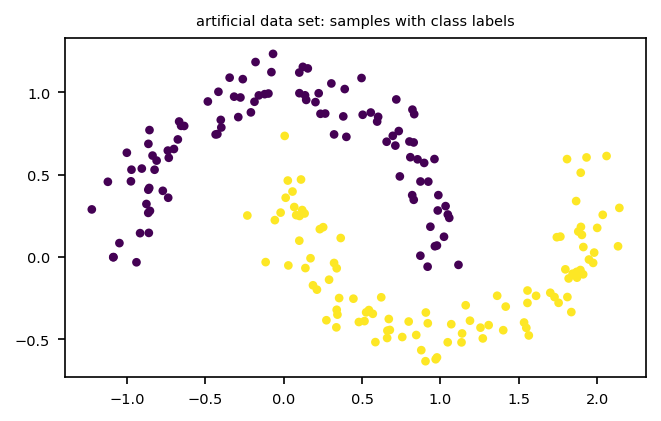

In [4]:
# data set with 200 samples
X, y_true = make_moons(200, noise=.1, random_state=random_state)
plt.figure(figsize=(5, 3), dpi=150)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_true, s=10)
plt.title('artificial data set: samples with class labels', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

Now that we have a data set, we should generate the annotators.

For that, we need labels and confidence scores.

In [5]:

# class labels of three annotators
n_annotators = 3
Y = random_state.randint(0, 2, size=600).reshape(200, n_annotators)
Y[:, 0] = y_true

# confidence scores of three annotators
C = random_state.uniform(0, 1, size=600).reshape(200, n_annotators)

# use samples X, labels Y, and certainties C to create instance of StandardAnnot
std_annot = StandardAnnot(X=X, Y=Y, C=C, random_state=random_state)


📊Let's check their performance.

accuracies: [1.0, 0.55, 0.565]


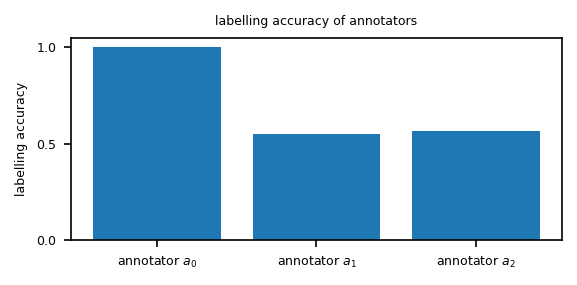

confusion matrices: [array([[100,   0],
       [  0, 100]]), array([[58, 42],
       [48, 52]]), array([[61, 39],
       [48, 52]])]


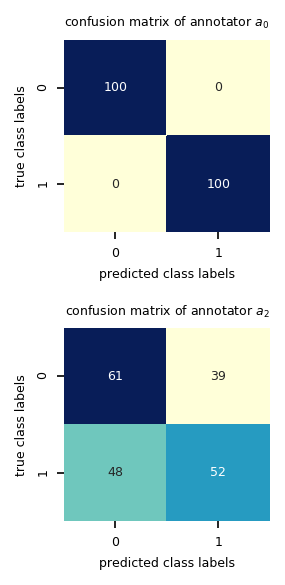

In [6]:
# accuracy as performance measure
acc = std_annot.labelling_performance(X=X, y_true=y_true,
                                      perf_func=accuracy_score)
# plot accuracy directly
fig, ax = std_annot.plot_labelling_accuracy(X=X, y_true=y_true,
                                            figsize=(4, 2), fontsize=6)
print('accuracies: '+str(acc))
plt.tight_layout()
plt.show()

# confusion matrix as performance measure
conf_matrices = std_annot.labelling_performance(X=X, y_true=y_true,
                                                perf_func=confusion_matrix)
y_unique = np.unique(y_true)
fig, ax = std_annot.plot_labelling_confusion_matrices(X=X, y_true=y_true,
                                                      annotator_ids=[0, 2],
                                                      y_unique=y_unique,
                                                      figsize=(2, 2),
                                                      fontsize=6)
plt.tight_layout()
plt.show()

Congratulations 👏🏽👏🏽👏🏽

You can now simulate basic annotators. Please checkout the documentation for further, more advanced examples.

Good luck with your research!